# Projet Python M2 IMSD

## 1. Pre-processing des données

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam
import os

%matplotlib inline
plt.style.use('seaborn-whitegrid') # theme
plt.rcParams['figure.figsize'] = (12,8) # taille des figures

In [6]:
extract = pd.read_csv("/home/sam/Documents/cours/python/football-ligue-1-scraping-eda-master/exctrat.csv")

FileNotFoundError: [Errno 2] File b'/home/sam/Documents/cours/python/football-ligue-1-scraping-eda-master/exctrat.csv' does not exist: b'/home/sam/Documents/cours/python/football-ligue-1-scraping-eda-master/exctrat.csv'

In [3]:
print(extract.shape)
extract.head()

(5953, 14)


,date,day,hours,odds_a,odds_b,odds_draw,outcome_effectif,outcome_odds,prediction_odds,score_a,score_b,season,team_a,team_b
0,2019-10-26 18:00:00,Saturday,18:00,2.36,3.19,3.27,HOME,HOME,1,2,0,2019/2020,Brest,Dijon
1,2019-10-26 18:00:00,Saturday,18:00,1.43,7.80,4.52,HOME,HOME,1,2,0,2019/2020,Lyon,Metz
2,2019-10-26 18:00:00,Saturday,18:00,2.22,3.58,3.17,DRAW,HOME,0,0,0,2019/2020,Montpellier,Angers
3,2019-10-26 18:00:00,Saturday,18:00,1.65,5.97,3.67,DRAW,HOME,0,0,0,2019/2020,Reims,Nimes
4,2019-10-26 18:00:00,Saturday,18:00,1.91,4.56,3.33,HOME,HOME,1,1,0,2019/2020,Strasbourg,Nice


In [4]:
del extract['date'] # ou extract.drop(extract.columns[0],axis=1) ou extract.drop('date',axis=1)

On vérifie que la base ne contient pas de valeurs manquantes :

In [5]:
extract.isnull().sum()

day                 0
hours               0
odds_a              0
odds_b              0
odds_draw           0
outcome_effectif    0
outcome_odds        0
prediction_odds     0
score_a             0
score_b             0
season              0
team_a              0
team_b              0
dtype: int64

In [6]:
extract.dtypes

day                  object
hours                object
odds_a              float64
odds_b              float64
odds_draw           float64
outcome_effectif     object
outcome_odds         object
prediction_odds       int64
score_a               int64
score_b               int64
season               object
team_a               object
team_b               object
dtype: object

On retire la saison 2003/2004 car les données la concernant sont incomplètes. On retire également la saison 2019/2020 car elle est encore en cours. On change ensuite le contenu de la variable *season* afin de garder seulement la première année. Par exemple, dans ce qui suit, la saison 2015/2016 sera simplement appelée saison 2015.

In [7]:
df = extract[(extract.season != "2019/2020") & (extract.season != "2003/2004")]
df.shape

(5696, 13)

In [8]:
df['season'] = df['season'].str[:4]

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Créer un dicitonnaire avec la saison en clé et un dataframe avec toutes les données correspondantes en valeur :

In [9]:
values=[]
for season, df_season in df.groupby('season'):
    values.append(df_season)

mydict = dict(list(enumerate(values)))

for i in range(0,15) :
    mydict[list(reversed(df['season'].unique()))[i]] = mydict.pop(i)
    
mydict.keys()

dict_keys(['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])

Une saison est censée comporter, au moins, 380 matches (38 journées de 10 matches). Certaines saisons peuvent comporter moins de matches du fait des forfaits ou des annulations de scores prononcés par la Ligue de Football Professionnel. Aussi, depuis 2016, des barrages de relégation ont été instaurés afin de déterminer si le club classé 18ème descend en division inférieure. Cela explique les matches supplémentaires à partir de la saison 2016. En plus d'opposer des équipes de Ligue 1 à des clubs de Ligue 2, ces confrontations représentent un enjeu tel que nous avons décidé de les exclure de la base.

In [10]:
df.groupby("season").count()

,day,hours,odds_a,odds_b,odds_draw,outcome_effectif,outcome_odds,prediction_odds,score_a,score_b,team_a,team_b
season,,,,,,,,,,,,
2004,377,377,377,377,377,377,377,377,377,377,377,377
2005,379,379,379,379,379,379,379,379,379,379,379,379
2006,378,378,378,378,378,378,378,378,378,378,378,378
2007,380,380,380,380,380,380,380,380,380,380,380,380
2008,380,380,380,380,380,380,380,380,380,380,380,380
2009,377,377,377,377,377,377,377,377,377,377,377,377
2010,380,380,380,380,380,380,380,380,380,380,380,380
2011,380,380,380,380,380,380,380,380,380,380,380,380
2012,380,380,380,380,380,380,380,380,380,380,380,380


In [11]:
mydict["2018"].head()

,day,hours,odds_a,odds_b,odds_draw,outcome_effectif,outcome_odds,prediction_odds,score_a,score_b,season,team_a,team_b
107,Sunday,19:00,2.56,3.03,3.03,HOME,HOME,1,3,1,2018,Dijon,Lens
108,Thursday,18:45,2.14,3.88,3.07,DRAW,HOME,0,1,1,2018,Lens,Dijon
109,Friday,19:05,1.55,6.42,4.03,HOME,HOME,1,2,1,2018,Amiens,Guingamp
110,Friday,19:05,2.15,3.20,3.78,DRAW,HOME,0,1,1,2018,Angers,St Etienne
111,Friday,19:05,2.04,4.04,3.25,AWAY,HOME,0,0,1,2018,Caen,Bordeaux


In [12]:
mydict["2016"] = mydict["2016"].drop(mydict["2016"].index[[0,1]])
mydict["2017"] = mydict["2017"].drop(mydict["2017"].index[[0,1,2,13]])
mydict["2018"] = mydict["2018"].drop(mydict["2018"].index[[0,1,12,13]])
# Verification de la cohérence :
print(mydict["2016"].shape)
print(mydict["2017"].shape)
print(mydict["2018"].shape)

mydict["2018"].head()

(379, 13)
(380, 13)
(380, 13)


,day,hours,odds_a,odds_b,odds_draw,outcome_effectif,outcome_odds,prediction_odds,score_a,score_b,season,team_a,team_b
109,Friday,19:05,1.55,6.42,4.03,HOME,HOME,1,2,1,2018,Amiens,Guingamp
110,Friday,19:05,2.15,3.20,3.78,DRAW,HOME,0,1,1,2018,Angers,St Etienne
111,Friday,19:05,2.04,4.04,3.25,AWAY,HOME,0,0,1,2018,Caen,Bordeaux
112,Friday,19:05,1.45,6.36,5.02,HOME,HOME,1,2,1,2018,Dijon,Toulouse
113,Friday,19:05,1.86,4.00,3.91,HOME,HOME,1,1,0,2018,Marseille,Montpellier


## 2. Analyse des cotes des bookmakers

L'intérêt de cette partie va être d'étudier la justesse des prévisions des bookmarkers. Pour se faire, nous allons simplement calculer les gains obtenus pour une mise de 10€ sur chaque match en se fiant aux prévisions des bookmakers. Nous allons ensuite comparer les gains obtenus avec ceux résultant d'une stratégie qui consisterait à toujours parier sur l'équipe à domicile, toujours parier sur l'équipe à l'extérieur, toujours parier match nul. Nous pourrons également évaluer si les bookmakers s'améliorent à mesure que les saisons passent.

In [13]:
df_work = pd.concat([mydict[key] for key in mydict.keys()])
print(df_work.shape)
df_work.head()
print(df_work['prediction_odds'].mean()) # Depuis 2004, les books se sont trompés une fois sur deux

(5686, 13)
0.5007034822370735


On créé une nouvelle colonne qui, pour chaque match, nous donne le gain résultant d'une mise de 10€ suivant la stratégie choisie :

In [14]:
# Stratégie : suivre les bookmakers
odds_true = [None]*df_work.shape[0]
for i in range(0,df_work.shape[0]) :
    if df_work['outcome_effectif'].iloc[i] == 'HOME' :
        odds_true[i] = df_work['odds_a'].iloc[i]
    elif df_work['outcome_effectif'].iloc[i] == 'AWAY':
        odds_true[i] = df_work['odds_b'].iloc[i]
    else :
        odds_true[i] = df_work['odds_draw'].iloc[i]   
        
print(odds_true[0:5])

book_strat = [None]*df_work.shape[0]
for i in range(0,df_work.shape[0]) :
    if df_work['prediction_odds'].iloc[i] == 1 :
        book_strat[i] = 10*(odds_true[i]-1)
    else :
        book_strat[i] = -10
        
df_work['book_strat_gain'] = book_strat

[1.47, 2.72, 2.69, 5.83, 1.63]


In [15]:
# Stratégie : toujours parier sur l'équipe à domicile
dom_strat = [None]*df_work.shape[0]
for i in range(0,df_work.shape[0]) :
    if df_work['outcome_effectif'].iloc[i] == 'HOME' :
        dom_strat[i] = 10*(df_work['odds_a'].iloc[i]-1)
    else :
        dom_strat[i] = -10
df_work['dom_strat_gain'] = dom_strat

    
# Stratégie : toujours parier sur l'équipe à l'extérieur
ext_strat = [None]*df_work.shape[0]
for i in range(0,df_work.shape[0]) :
    if df_work['outcome_effectif'].iloc[i] == 'AWAY' :
        ext_strat[i] = 10*(df_work['odds_b'].iloc[i]-1)
    else : 
        ext_strat[i] = -10
df_work['ext_strat_gain'] = ext_strat
    
# Stratégie : toujours parier sur le match nul
draw_strat = [None]*df_work.shape[0]
for i in range(0,df_work.shape[0]) :
    if df_work['outcome_effectif'].iloc[i] == 'DRAW' :
        draw_strat[i] = 10*(df_work['odds_draw'].iloc[i]-1)
    else :
        draw_strat[i] = -10
df_work['draw_strat_gain'] = draw_strat

In [17]:
'''
df_work['dom_strat_gain'] = [None]*df_work.shape[0]
for i in range(0,df_work.shape[0]) :
    if df_work['outcome_effectif'].iloc[i] == 'HOME' :
        df_work['dom_strat_gain'][i] = 10*(df_work['odds_a'].iloc[i]-1)
    else :
        df_work['dom_strat_gain'][i] = -10
'''

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [18]:
df_work.head()

,day,hours,odds_a,odds_b,odds_draw,outcome_effectif,outcome_odds,prediction_odds,score_a,score_b,season,team_a,team_b,dom_strat_gain
5426,Saturday,18:00,1.47,5.72,3.76,HOME,HOME,1,3,1,2004,AC Ajaccio,Sochaux,None
5427,Saturday,18:00,2.68,2.72,2.69,AWAY,HOME,0,1,3,2004,Auxerre,Lille,None
5428,Saturday,18:00,2.37,3.14,2.69,DRAW,HOME,0,3,3,2004,Bordeaux,Marseille,None
5429,Saturday,18:00,5.83,1.48,3.68,HOME,AWAY,0,3,2,2004,Istres,Caen,None
5430,Saturday,18:00,1.63,4.99,3.30,HOME,HOME,1,1,0,2004,Lens,Toulouse,None


On vérifie la cohérence des manipulaitons sur les premières observations du dataframe puis on calcule la somme des gains pour chaque stratégie :

In [16]:
df_work.head()

,day,hours,odds_a,odds_b,odds_draw,outcome_effectif,outcome_odds,prediction_odds,score_a,score_b,season,team_a,team_b,book_strat_gain,dom_strat_gain,ext_strat_gain,draw_strat_gain
5426,Saturday,18:00,1.47,5.72,3.76,HOME,HOME,1,3,1,2004,AC Ajaccio,Sochaux,4.7,4.7,-10.0,-10.0
5427,Saturday,18:00,2.68,2.72,2.69,AWAY,HOME,0,1,3,2004,Auxerre,Lille,-10.0,-10.0,17.2,-10.0
5428,Saturday,18:00,2.37,3.14,2.69,DRAW,HOME,0,3,3,2004,Bordeaux,Marseille,-10.0,-10.0,-10.0,16.9
5429,Saturday,18:00,5.83,1.48,3.68,HOME,AWAY,0,3,2,2004,Istres,Caen,-10.0,48.3,-10.0,-10.0
5430,Saturday,18:00,1.63,4.99,3.30,HOME,HOME,1,1,0,2004,Lens,Toulouse,6.3,6.3,-10.0,-10.0


In [17]:
print("Book strat gain = {}".format(df_work['book_strat_gain'].sum()))
print("Home strat gain = {}".format(df_work['dom_strat_gain'].sum()))
print("Away strat gain = {}".format(df_work['ext_strat_gain'].sum()))
print("Draw strat gain = {}".format(df_work['draw_strat_gain'].sum()))

Book strat gain = -2383.3
Home strat gain = -3104.0
Away strat gain = -7262.1
Draw strat gain = -2653.7000000000003


Peu importe la stratégie choisie, les gains réalisés auraient été négatifs. Cela était parfaitement attendu et s'explique par le fait que nous avons simulé une mise sur chacun des matches contenus dans la base, y compris ceux à l'issue incertaine. Une règle de base des paris sportifs est de ne pas parier sur l'ensemble des matches mais plutôt de cibler et suivre attentivement les performances d'un nombre très restreint d'équipe. Aussi, contrairement à d'autres championnats nationaux, les résultats de Ligue 1 sont réputés être difficile à prédire.

Afin d'affiner l'analyse, on peut reconduire la même étude mais au niveau d'un club ou encore en considérant chaque saison séparemment. Nous avons choisi de mettre en oeuvre cette dernière option.

In [18]:
temp = df_work.groupby("season").sum().iloc[:,-4:]
temp.describe() # pas de valeurs aberrantes

,book_strat_gain,dom_strat_gain,ext_strat_gain,draw_strat_gain
count,15.000000,15.000000,15.000000,15.000000
mean,-158.886667,-206.933333,-484.140000,-176.913333
std,190.947921,214.787206,294.288082,310.519815
min,-494.400000,-506.600000,-1300.100000,-738.900000
25%,-273.800000,-369.100000,-651.700000,-274.700000
50%,-155.900000,-234.700000,-406.400000,-218.200000
75%,-30.400000,-64.800000,-322.750000,-61.950000
max,173.300000,234.100000,-106.900000,530.800000


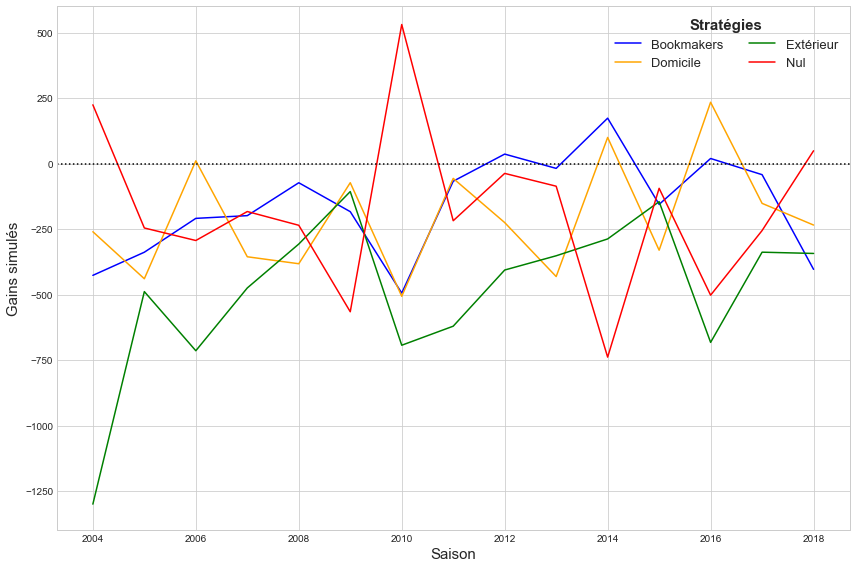

In [23]:
plt.plot(range(2004,2019),temp['book_strat_gain'].values, label = "Bookmakers", color = "blue")
plt.plot(range(2004,2019),temp['dom_strat_gain'].values, label = "Domicile", color = "orange")
plt.plot(range(2004,2019),temp['ext_strat_gain'].values, label = "Extérieur", color = "green")
plt.plot(range(2004,2019),temp['draw_strat_gain'].values, label = "Nul", color = "red")
plt.axhline(y = 0, color = "black", linestyle = ':')
# légende :
leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Stratégies", prop = {'size':'15', 'weight':'bold'})
plt.xlabel("Saison",size=15)
plt.ylabel("Gains simulés",size=15)
plt.ylim([-1400, 600])
plt.tight_layout()
plt.show()

## 3. Prediction du score des matches à l'aide de la loi de Poisson

Soit $X$ une variable aléatoire représentant le nombre buts inscrits durant un match de Ligue 1. L'ensemble des valeurs pouvant être prises par $X$ est donc restreint à l'ensemble $\mathbb{N}$ des entiers naturels. De ce fait, l'utilisation d'un modèle linéaire "classique" n'est pas appropriée à la modélisation du nombre de buts par match. Pour pallier ce problème, on utilise un modèle linéaire dit généralisé (GLM). Sans entrer dans les détails, ce type de modélisation permet de traiter les cas ou les caractéristiques de la variable modélisée ne satisfont pas les hypothèses sous-jacentes d'un modèle linéaire classique. Parmi les différentes lois de probabilité pouvant être utilisées dans un GLM, la loi de Poisson est utilisée afin de modéliser le nombre d'occurrences d'un évènement pendant un intervalle de temps donné. La loi de probabilité d'une variable aléatoire $X$ suivant une loi de Poisson est donné par : $P(X=x)=\frac{e^{-\lambda}\lambda^{x}}{k!} $. Le paramètre $\lambda$ de la loi est désigné comme étant le nombre de nombre moyen d'occurrences pendant l'intervalle de temps susmentionné. En effet, on peut facilement montrer que $\mathbb{E}(X)=\lambda$.

On se focalise d'abord sur une saison, à voir si ça sert vrmt à qqch d'élargir à toutes et refaire 1000 graphs.

In [24]:
mydict['2017'].describe()

,odds_a,odds_b,odds_draw,prediction_odds,score_a,score_b
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.895132,5.230737,4.209921,0.544737,1.528947,1.189474
std,2.787040,5.746650,2.057790,0.498651,1.347999,1.125804
min,1.040000,1.110000,2.790000,0.000000,0.000000,0.000000
25%,1.700000,2.607500,3.230000,0.000000,1.000000,0.000000
50%,2.160000,3.725000,3.480000,1.000000,1.000000,1.000000
75%,2.932500,5.370000,4.170000,1.000000,2.000000,2.000000
max,28.980000,48.260000,18.070000,1.000000,8.000000,5.000000


On remarque d'abord que l'équipe à domicile inscrit en moyenne 1.53 buts tandis que l'équipe à l'extérieur en inscrit 1.19. Ces moyennes sont modélisées par le paramètre $\lambda$ dans la loi de Poisson. On remarque également que le nombre maximum de buts inscrits est égal à 8 pour l'équipe à domicile et 5 pour l'équipe à l'extérieur.

Une fois le paramètre $\lambda$ obtenu, on peut désormais calculer la probabilité qu'une équipe inscrit un nombre donné de buts selon qu'elle joue à domicile ou à l'extérieur. On modèlise les buts à l'extérieur et à domicile séparemment. Par exemple la probabilité que l'équipe à domicile inscrive 3 buts est égale à 13% ; la probabilité de cet évènement est de 9% pour une équipe à l'extérieur :

In [25]:
print(poisson.pmf(3, mydict['2017'].mean()[4]))
print(poisson.pmf(3, mydict['2017'].mean()[5]))
print(sum(poisson.pmf(i, mydict['2017'].mean()[4]) for i in range(0,9)))
print(sum(poisson.pmf(i, mydict['2017'].mean()[5]) for i in range(0,6)))

0.12912577814673956
0.08537513565995834
0.9999678921824233
0.9985644299035941


Similairement, on peut recalculer cette probabilité pour n'importe quel $x \in \mathbb{N}$, puis comparer les probabilités obtenues à l'aide la loi de Poisson avec les fréquences effectivement observées :

In [26]:
poisson_proba = np.column_stack([[poisson.pmf(i, mydict['2017'].mean()[j]) for i in range(9)] for j in [4,5]]) # prends 2 numpy object et les met en colonnes
poisson_proba

array([[2.16763720e-01, 3.04381423e-01],
       [3.31420319e-01, 3.62053692e-01],
       [2.53362112e-01, 2.15326670e-01],
       [1.29125778e-01, 8.53751357e-02],
       [4.93566297e-02, 2.53878693e-02],
       [1.50927378e-02, 6.03964048e-03],
       [3.84600029e-03, 1.19733224e-03],
       [8.40047432e-04, 2.03456455e-04],
       [1.60548539e-04, 3.02507624e-05]])

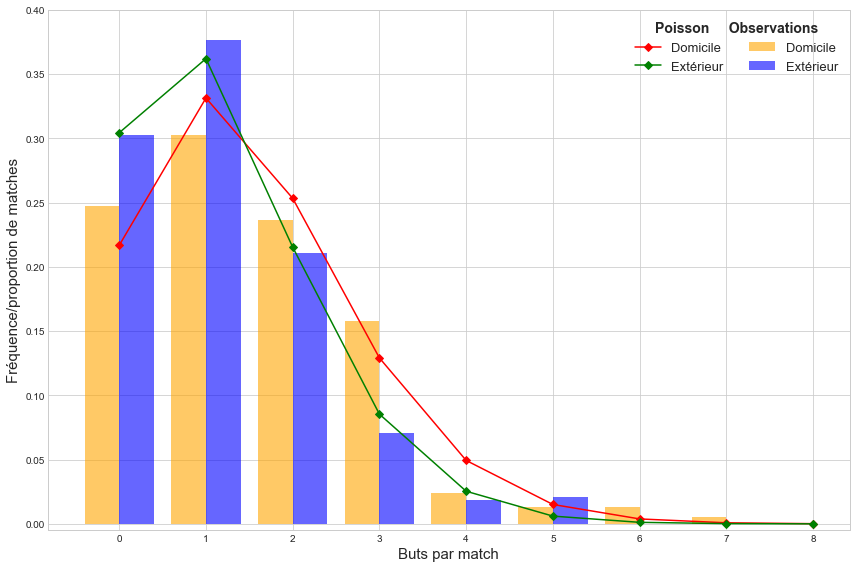

In [27]:
# histogramme des buts marqués :
plt.hist(mydict['2017'][['score_a', 'score_b']].values, range(9), alpha=0.6, label=['Domicile', 'Extérieur'],
         density=True, color=["orange", "blue"])
# ajouter les lignes pour les probabilités des lois de Poisson :
poison_dom, = plt.plot([i-0.5 for i in range(1,10)], poisson_proba[:,0],
                  linestyle='-', marker='D',label="Domicile", color = 'red')
pois_ext, = plt.plot([i-0.5 for i in range(1,10)], poisson_proba[:,1],
                  linestyle='-', marker='D',label="Extérieur", color = 'green')
# légende :
leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson     Observations", prop = {'size':'14', 'weight':'bold'})
plt.xticks([i-0.5 for i in range(1,10)],[i for i in range(9)])
plt.xlabel("Buts par match",size=15)
plt.ylabel("Fréquence/proportion de matches",size=15)
plt.ylim([-0.005, 0.4])
plt.tight_layout()
plt.show()

Le graphique se lit comme suit : on observe que l'équipe à domicile inscrit excatement un but dans près de 25% des matches, et que l'équipe à l'extérieur inscrit excatement un but dans près de 30% des matches. Ces fréquences empiriques sont ensuite à comparer avec les probabilités issues des lois de Poisson. On voit que les probabilités générées avec la loi de Poisson suivent assez fidèlement les fréquences observées. Notamment, les croisements entre les deux courbes se fait bien entre 1 et 2 buts.

La loi de Poisson semble donc adapter à la modélisation du nombre de buts par match, donc à la modélisation du score d'un match et finalement à la prédiction de l'issue d'un match. C'est ce que nous allons maintenant étudier.